In [152]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [153]:
coffeeDataSet = pd.read_csv('data\Coffee_Chain_Sales .csv')

In [154]:
dataSet = coffeeDataSet.copy()

In [155]:
dataSet

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Product,Profit,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type
0,303,51,-35,10/1/2012,503,71,Major Market,Central,46,Leaves,...,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,...,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,-22,10/2/2012,419,64,Major Market,South,13,Leaves,...,Lemon,28,107,Texas,30,60,50,90,36,Decaf
3,850,38,-15,10/3/2012,871,56,Major Market,East,10,Leaves,...,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
4,562,72,6,10/4/2012,650,110,Major Market,West,23,Leaves,...,Green Tea,56,182,California,20,60,50,80,54,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,775,250,133,8/23/2015,1820,251,Small Market,West,70,Leaves,...,Earl Grey,233,534,Nevada,180,180,100,360,94,Regular
1058,971,88,48,8/24/2015,817,133,Small Market,West,29,Leaves,...,Earl Grey,108,236,Oregon,60,100,60,160,60,Regular
1059,775,294,-285,8/25/2015,8252,-294,Small Market,West,111,Leaves,...,Green Tea,-605,33,Nevada,210,-210,-320,0,145,Regular
1060,503,134,80,8/26/2015,690,186,Small Market,West,41,Leaves,...,Green Tea,180,341,Oregon,90,140,100,230,65,Regular


# Myynti osavaltiota kohden

In [156]:
stateSaleSet = dataSet.copy()
stateSaleSet = stateSaleSet.groupby(['State'])['Sales'].sum().reset_index()
stateSaleSet

,State,Sales
0,California,23032
1,Colorado,12112
2,Connecticut,6670
3,Florida,8825
4,Illinois,16812
5,Iowa,13359
6,Louisiana,6193
7,Massachusetts,7339
8,Missouri,6072
9,Nevada,14822


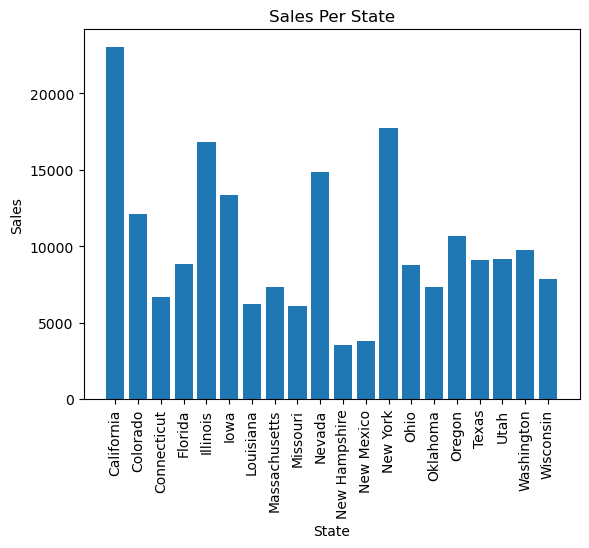

In [157]:
plt.bar(stateSaleSet['State'], stateSaleSet['Sales'])
plt.xlabel('State')
plt.ylabel('Sales')
plt.title('Sales Per State')
plt.xticks(rotation='vertical')
plt.show()

# Voitto osavaltiota kohden

In [158]:
stateProfit = dataSet.copy()
stateProfit = stateProfit.groupby(['State'])['Profit'].sum().reset_index()
stateProfit

,State,Profit
0,California,7340
1,Colorado,4450
2,Connecticut,2066
3,Florida,2794
4,Illinois,7380
5,Iowa,5412
6,Louisiana,2026
7,Massachusetts,3710
8,Missouri,956
9,Nevada,2556


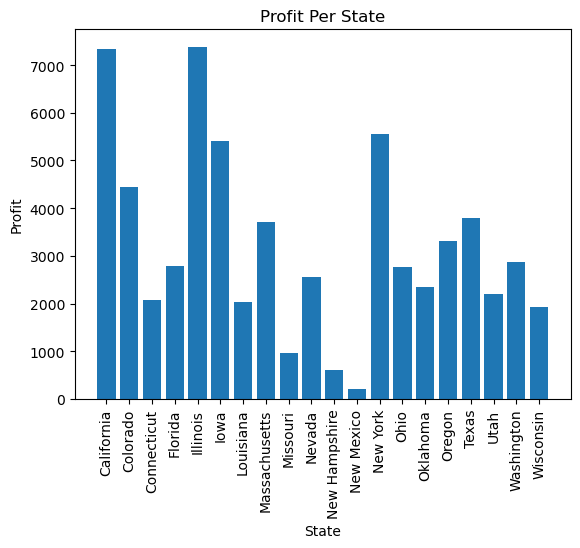

In [159]:
plt.bar(stateProfit['State'], stateProfit['Profit'])
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('Profit Per State')
plt.xticks(rotation='vertical')
plt.show()

# Kofeinittomien ja kofeinillisten myynti

In [160]:
regularOrDecaf = dataSet.copy()
regularOrDecaf = regularOrDecaf.groupby(['Type'])['Sales'].sum().reset_index()
regularOrDecaf

,Type,Sales
0,Decaf,85404
1,Regular,117491


In [161]:
def prosentOfSales(dataSet):
    i = 0
    for item in dataSet:
        totalSales = dataSet['Sales'].sum()
        regularOrDecaf['%OfSales'][i] = regularOrDecaf['Sales'][i] / totalSales * 100
        i += 1

In [162]:
prosentOfSales(regularOrDecaf)

KeyError: '%OfSales'

In [ ]:
regularOrDecaf

,Type,Sales,%OfSales
0,Decaf,85404,57.907292
1,Regular,117491,57.907292


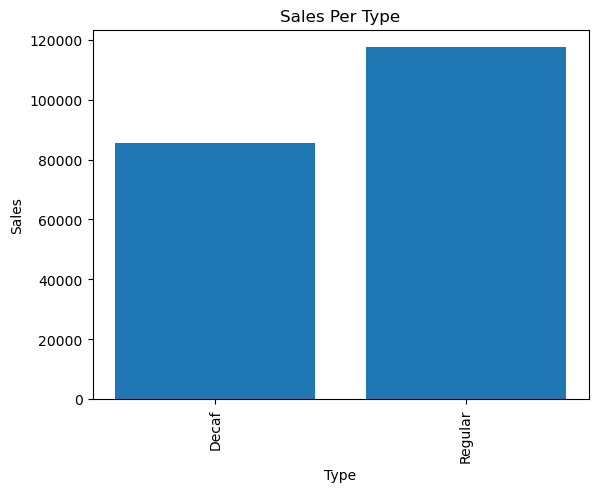

In [ ]:
plt.bar(regularOrDecaf['Type'], regularOrDecaf['Sales'])
plt.xlabel('Type')
plt.ylabel('Sales')
plt.title('Sales Per Type')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
mostPopularItem = dataSet.copy()
mostPopularItem = mostPopularItem.groupby(['Product'])['Sales'].sum().reset_index()
mostPopularItem

,Product,Sales
0,Amaretto,6781
1,Caffe Latte,8665
2,Caffe Mocha,21716
3,Chamomile,19295
4,Colombian,30761
5,Darjeeling,17758
6,Decaf Espresso,18888
7,Decaf Irish Cream,14831
8,Earl Grey,16546
9,Green Tea,8520


# Myynti tuotetta kohden

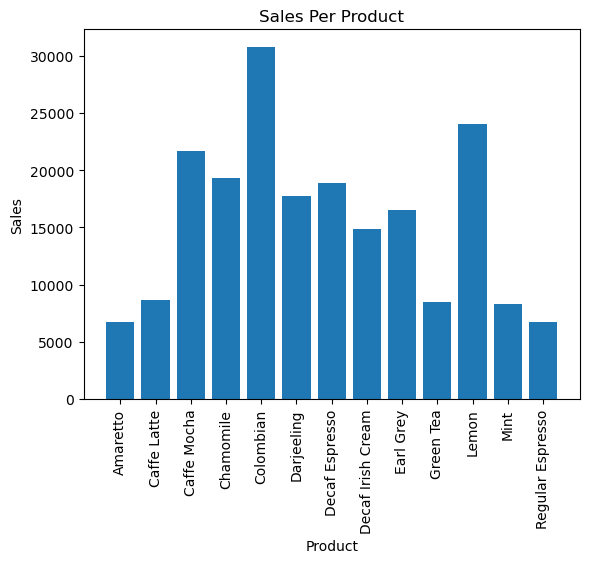

In [ ]:
plt.bar(mostPopularItem['Product'], mostPopularItem['Sales'])
plt.xlabel('Product')
plt.ylabel('Sales')
plt.title('Sales Per Product')
plt.xticks(rotation='vertical')
plt.show()

# Voiton myytyä tuotetta kohden

In [ ]:
def bestProduct():
    uniqProducts = dataSet['Product'].unique()
    productData = {}

    for product in uniqProducts:
        prod = dataSet[dataSet['Product'] == product]
        sales = pd.DataFrame(prod['Sales']).to_numpy()
        profit = pd.DataFrame(prod['Profit']).to_numpy()
        profitPersale = np.divide(np.sum(profit, axis=0), np.sum(sales, axis=0))
        productData[product] = profitPersale
    
    return productData

In [ ]:
best = bestProduct()
key = np.array(list(best.keys()))
value = np.array(list(best.values())).ravel()

<function matplotlib.pyplot.show(close=None, block=None)>

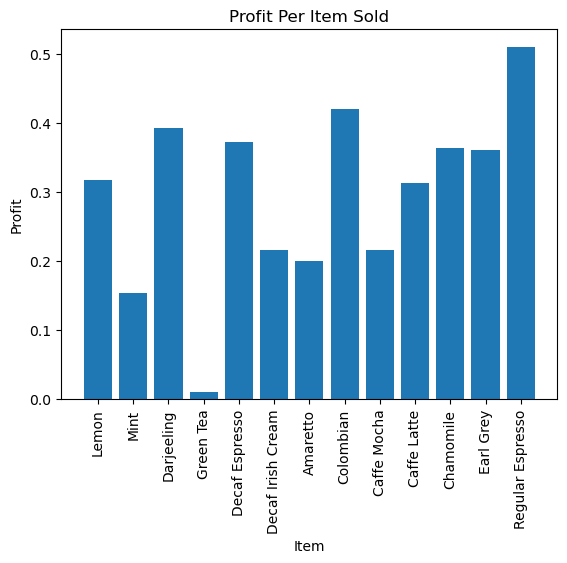

In [ ]:
plt.bar(key, value)
plt.xlabel('Item')
plt.ylabel('Profit')
plt.title('Profit Per Item Sold')
plt.xticks(rotation='vertical')
plt.show